In [19]:
%pylab inline
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [45]:
data = pd.read_excel('../data/arrests.xlsx')

In [46]:
data

,Arrest Number,Case Number,Name ID,Race,Ethnicity,Sex,Age,Arrest Date,Arrest Time,Arrest Type,...,UCR Code,Statute,Description,F/M,Counts,Location of Arrest,X,Y,District,Beat
0,189557,6010503,109529,B,N,M,44,2006-04-01,9:17:00PM,Order For Arrest,...,2640,FTA,FAILURE TO APPEAR,M,1,RIDGEWAY AVE/SIMA AVE,2032779,810178,D4,413
1,189565,6010510,292137,B,NaN,M,43,2006-04-01,10:45:00PM,Order For Arrest,...,2640,15A-305(B)(2),FAIL TO APPEAR,M,1,W CLUB BLVD/WASHINGTON ST,2029633,825230,D2,214
2,189565,6010510,292137,B,NaN,M,43,2006-04-01,10:45:00PM,Order For Arrest,...,2640,15A-305(B)(2),FAIL TO APPEAR,M,1,W CLUB BLVD/WASHINGTON ST,2029622,825129,D2,214
3,189626,6010410,539201,B,N,M,16,2006-04-01,12:28:00AM,On-View,...,810,14-33(A),SIMPLE ASSAULT & BATTERY OR AFFRAY,M,1,200 FOSTER ST,2029075,817939,D5,522
4,189630,6010410,640493,B,N,M,18,2006-04-01,12:28:00AM,On-View,...,810,14-33(A),SIMPLE ASSAULT & BATTERY OR AFFRAY,M,1,200 FOSTER ST,2029185,817824,D5,522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182985,306955,18033724,663108,B,N,M,32,2018-09-30,6:57:00PM,Citation,...,1810,90-95(A3)6,POSSESS CONTROL SUBSTANCE SCHEDULE VI,M,1,2500 MERIDIAN PKWY,2030655,786074,D4,421
182986,306956,18033821,947029,B,N,F,25,2018-09-30,8:03:00PM,On-View,...,810,14-33(A),SIMPLE ASSAULT & BATTERY OR AFFRAY,M,1,400 LIBERTY ST,2030877,816619,D5,522
182987,306956,18033821,947029,B,N,F,25,2018-09-30,8:03:00PM,On-View,...,2640,15A-305(B)(2),FAIL TO APPEAR,M,1,400 LIBERTY ST,2030902,816594,D5,522
182988,306958,18033823,106469,B,N,M,54,2018-09-30,8:55:00PM,On-View,...,2100,20-138.1,DRIVING WHILE IMPAIRED,M,1,AVONDALE DR/NANCY ST,2033592,823065,D2,212


# Analysing arrest data
### Hypothesis: most arrests will happen in central urban areas, between 8pm and 2am, on Fridays and Saturdays.



A simple histogram like the one below is of limited utility:

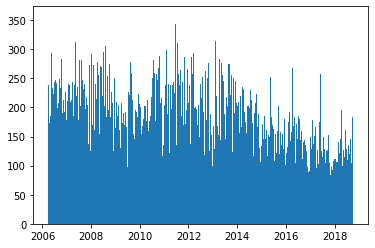

In [31]:
hist(data['Arrest Date'], bins = 1000);

First, we need to combine the 'Arrest Date' and 'Arrest Time' columns in order to create a single datetime column that we can use more easily with pandas. This requires the conversion of the 'Arrest Date' column into a string:

In [47]:
data['Arrest Date'] = data['Arrest Date'].astype(str)

Combining 'Arrest Date' and 'Arrest Time' columns:

In [51]:
data['datetime'] = data['Arrest Date'] + ' ' + data['Arrest Time']

In [52]:
data.loc[7]

Arrest Number                               189635
Case Number                                6010413
Name ID                                     369125
Race                                             W
Ethnicity                                        H
Sex                                              M
Age                                             33
Arrest Date                             2006-04-01
Arrest Time                              1:23:00AM
Arrest Type                                On-View
Sequence                                         3
UCR Code                                      1834
Statute                                     DRUGPA
Description           DRUG EQUIPMENT/PARAPHERNALIA
F/M                                              M
Counts                                           1
Location of Arrest                    900 BROAD ST
X                                          2023907
Y                                           823909
District                       

In [53]:
data['datetime'] = data['datetime'].map(pd.to_datetime)

In [54]:
data

,Arrest Number,Case Number,Name ID,Race,Ethnicity,Sex,Age,Arrest Date,Arrest Time,Arrest Type,...,Statute,Description,F/M,Counts,Location of Arrest,X,Y,District,Beat,datetime
0,189557,6010503,109529,B,N,M,44,2006-04-01,9:17:00PM,Order For Arrest,...,FTA,FAILURE TO APPEAR,M,1,RIDGEWAY AVE/SIMA AVE,2032779,810178,D4,413,2006-04-01 21:17:00
1,189565,6010510,292137,B,NaN,M,43,2006-04-01,10:45:00PM,Order For Arrest,...,15A-305(B)(2),FAIL TO APPEAR,M,1,W CLUB BLVD/WASHINGTON ST,2029633,825230,D2,214,2006-04-01 22:45:00
2,189565,6010510,292137,B,NaN,M,43,2006-04-01,10:45:00PM,Order For Arrest,...,15A-305(B)(2),FAIL TO APPEAR,M,1,W CLUB BLVD/WASHINGTON ST,2029622,825129,D2,214,2006-04-01 22:45:00
3,189626,6010410,539201,B,N,M,16,2006-04-01,12:28:00AM,On-View,...,14-33(A),SIMPLE ASSAULT & BATTERY OR AFFRAY,M,1,200 FOSTER ST,2029075,817939,D5,522,2006-04-01 00:28:00
4,189630,6010410,640493,B,N,M,18,2006-04-01,12:28:00AM,On-View,...,14-33(A),SIMPLE ASSAULT & BATTERY OR AFFRAY,M,1,200 FOSTER ST,2029185,817824,D5,522,2006-04-01 00:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182985,306955,18033724,663108,B,N,M,32,2018-09-30,6:57:00PM,Citation,...,90-95(A3)6,POSSESS CONTROL SUBSTANCE SCHEDULE VI,M,1,2500 MERIDIAN PKWY,2030655,786074,D4,421,2018-09-30 18:57:00
182986,306956,18033821,947029,B,N,F,25,2018-09-30,8:03:00PM,On-View,...,14-33(A),SIMPLE ASSAULT & BATTERY OR AFFRAY,M,1,400 LIBERTY ST,2030877,816619,D5,522,2018-09-30 20:03:00
182987,306956,18033821,947029,B,N,F,25,2018-09-30,8:03:00PM,On-View,...,15A-305(B)(2),FAIL TO APPEAR,M,1,400 LIBERTY ST,2030902,816594,D5,522,2018-09-30 20:03:00
182988,306958,18033823,106469,B,N,M,54,2018-09-30,8:55:00PM,On-View,...,20-138.1,DRIVING WHILE IMPAIRED,M,1,AVONDALE DR/NANCY ST,2033592,823065,D2,212,2018-09-30 20:55:00
